# 5502 Data Mining Final Project

Collaborators: John Palmer, Jamie Voros, Warren Fulton


### Midterm review
In this notebook, we pull data from our .csv files into the Jupyter Notebook environment.

We are using Kaggle's [Crude Oil](https://www.kaggle.com/awadhi123/crude-oil-stock-price) data to begin with and plan to pull in several more databases containing market data.

Link to Kaggle stock csv's: https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs?fbclid=IwAR3B8sMCTBi8il_y_vDcgHZhCAFmJv4mftywyRapVosoRJ1aamGg15_Z4uM


In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, skew, kurtosis

In [41]:
crudeOilDF = pd.read_csv (r'crudeoil.csv')
crudeOilDF.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-03-22,27.65,28.250000,27.250000,27.459999,27.459999,92302.0
1,2000-03-23,27.65,27.780001,27.160000,27.309999,27.309999,79373.0
2,2000-03-24,27.85,28.150000,27.549999,27.980000,27.980000,55693.0
3,2000-03-26,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-03-27,27.65,28.020000,27.410000,27.730000,27.730000,59199.0


In [42]:
spy_df = pd.read_csv('SPY.csv', index_col=0, parse_dates=True)
print(spy_df.shape)
print(spy_df.columns)
print(spy_df.index)

(6998, 6)
Index([&#39;Open&#39;, &#39;High&#39;, &#39;Low&#39;, &#39;Close&#39;, &#39;Adj Close&#39;, &#39;Volume&#39;], dtype=&#39;object&#39;)
DatetimeIndex([&#39;1993-01-29&#39;, &#39;1993-02-01&#39;, &#39;1993-02-02&#39;, &#39;1993-02-03&#39;,
               &#39;1993-02-04&#39;, &#39;1993-02-05&#39;, &#39;1993-02-08&#39;, &#39;1993-02-09&#39;,
               &#39;1993-02-10&#39;, &#39;1993-02-11&#39;,
               ...
               &#39;2020-10-28&#39;, &#39;2020-10-29&#39;, &#39;2020-10-30&#39;, &#39;2020-11-02&#39;,
               &#39;2020-11-03&#39;, &#39;2020-11-04&#39;, &#39;2020-11-05&#39;, &#39;2020-11-06&#39;,
               &#39;2020-11-09&#39;, &#39;2020-11-10&#39;],
              dtype=&#39;datetime64[ns]&#39;, name=&#39;Date&#39;, length=6998, freq=None)


In [43]:
spy_df["LogAdjClose"] = np.log(spy_df["Adj Close"])
spy_df['LogReturn'] = spy_df["LogAdjClose"].diff(1)
spy_logRet = spy_df["LogReturn"].iloc[1:]
# print(spy_df.head())
print(spy_logRet)

Date
1993-02-01    0.007087
1993-02-02    0.002116
1993-02-03    0.010515
1993-02-04    0.004176
1993-02-05   -0.000694
                ...   
2020-11-04    0.022103
2020-11-05    0.019315
2020-11-06   -0.000228
2020-11-09    0.012487
2020-11-10   -0.001468
Name: LogReturn, Length: 6997, dtype: float64


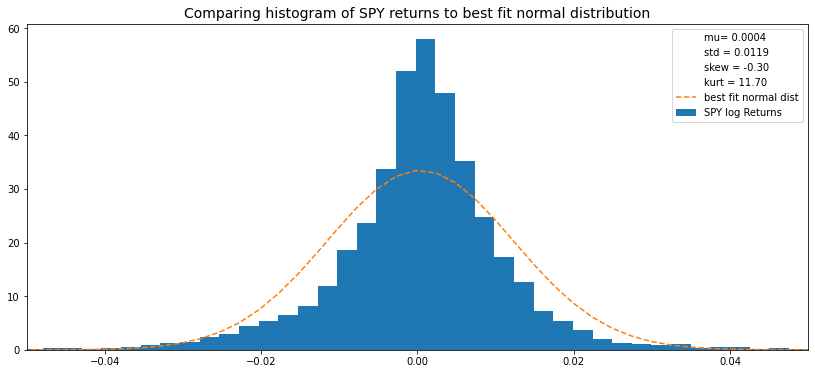

In [139]:
randomNormalData = np.random.normal(0, .0075, 6997) # mean, standard deviation, number of samples
plt.figure(figsize=(14,6))
plt.xlim(-.05, .05)
spyHist = plt.hist(spy_logRet, bins=100, density=True,label="SPY log Returns") # returns array containing values of bins (nbins length), array with bin edges (nbins + 1 length), list of patches?
spyMu, spyStd = norm.fit(spy_logRet)
spySkew = skew(spy_logRet)
spyKurtosis = kurtosis(spy_logRet)
y = norm.pdf(spyHist[1], spyMu, spyStd)
# plt.xlim(0.02, .06)
# plt.ylim(0,10)
# plt.hist(randomNormalData, bins=spyHist[1], density=True, alpha=.5, label="Random Normal Data")
plt.plot(0,0, color='white', label="mu= {:.4f}".format(spyMu))
plt.plot(0,0, color='white', label="std = {:.4f}".format(spyStd))
plt.plot(0,0, color='white', label="skew = {:.2f}".format(spySkew))
plt.plot(0,0, color='white', label="kurt = {:.2f}".format(spyKurtosis))
plt.plot(spyHist[1], y, '--', label='best fit normal dist')
plt.legend()
plt.title("Comparing histogram of SPY returns to best fit normal distribution", fontsize=14)
plt.show()